In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_excel("CW_Data.xlsx")
display(data)

,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


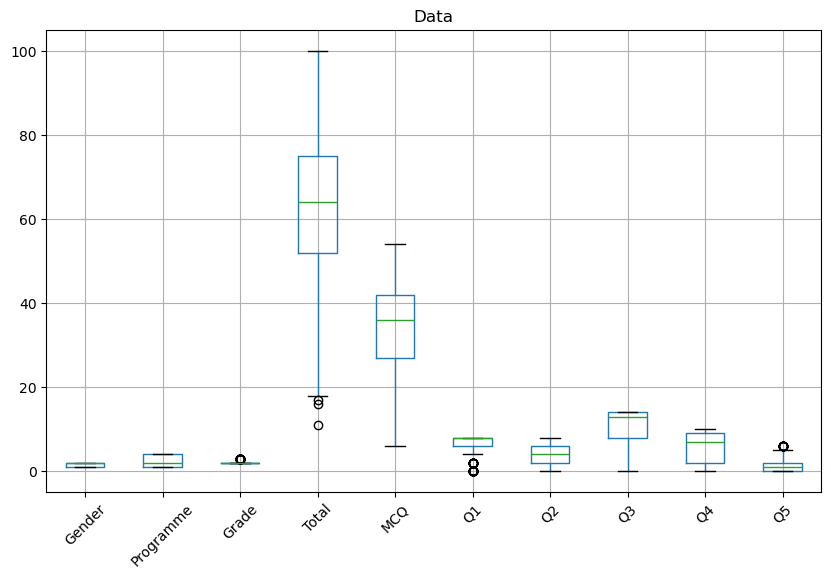

In [2]:
data1 = data.drop(columns=['Index'])
#先把Index去掉
#画个箱型图先
plt.figure(figsize=(10, 6))
data1.boxplot()
plt.title('Data')
plt.xticks(rotation=45)
plt.show()

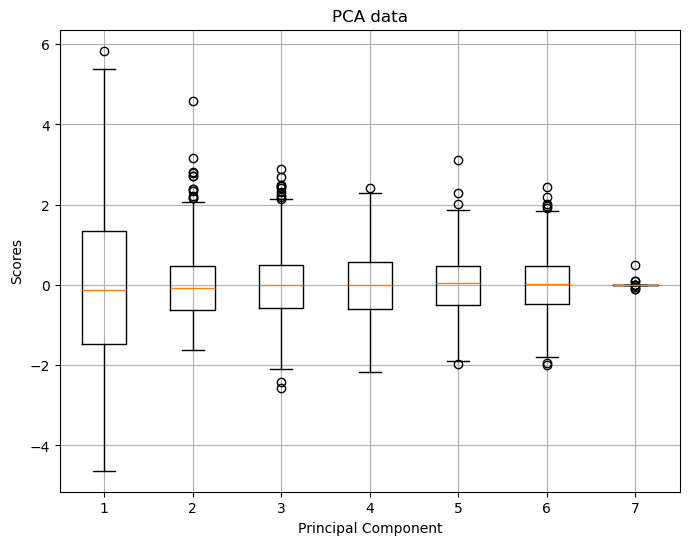

In [3]:
# 去掉前面三个后先标准化再直接PCA
data2 = data1.drop(columns=['Programme'])
data3 = data2.drop(columns=['Gender'])
data0 = data3.drop(columns=['Grade'])

#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data0)

pca = PCA()
score = pca.fit_transform(scaled_data)

#再画个PCA后的图
plt.figure(figsize=(8, 6))
plt.boxplot(score)
plt.title('PCA data')
plt.xlabel('Principal Component')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

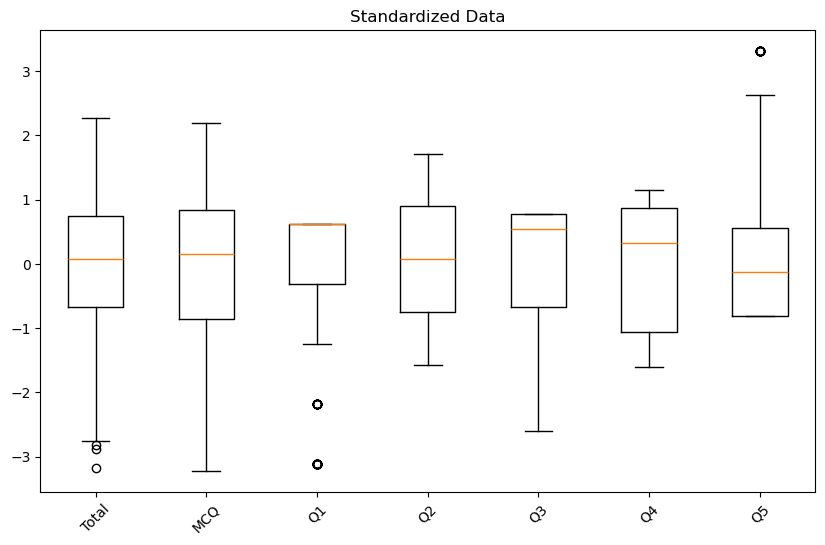

In [4]:
#再画个标准化后的图
plt.figure(figsize=(10, 6))
plt.boxplot(scaled_data, labels=data0.columns)
plt.title('Standardized Data')
plt.xticks(rotation=45)
plt.show()

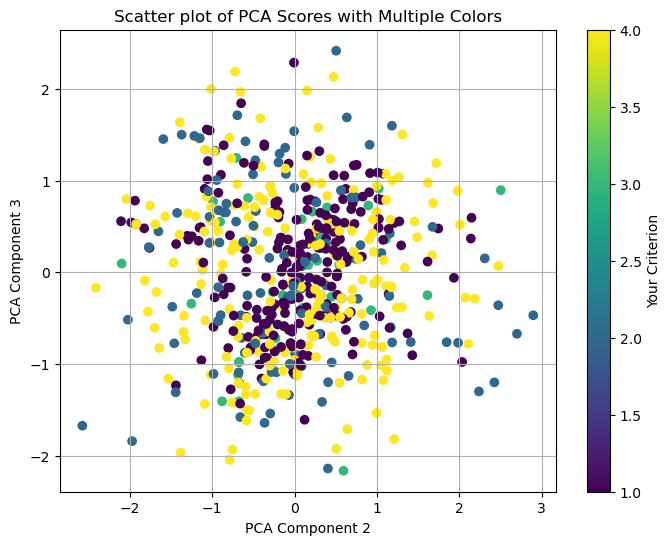

In [9]:
#找最好的特征组合
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 2], score[:, 3],c=data['Programme'],cmap='viridis')
plt.title('Scatter plot of PCA Scores with Multiple Colors')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.colorbar(label='Your Criterion')
plt.grid(True)
plt.show()

In [6]:
# 获取主成分的加载向量
loadings = pca.components_
 
# 创建 DataFrame 显示加载向量
loadings_df = pd.DataFrame(loadings, columns=data0.columns)

# 显示加载向量表格
print("Loadings of Original Features in Principal Components:")
print(loadings_df)


Loadings of Original Features in Principal Components:
      Total       MCQ        Q1        Q2        Q3        Q4        Q5
0 -0.509193 -0.402841 -0.294108 -0.366588 -0.334273 -0.369749 -0.330307
1 -0.053390 -0.025233 -0.682672  0.142880 -0.282694  0.199942  0.624632
2  0.108448  0.244342 -0.585547  0.260051  0.515329 -0.383905 -0.324188
3  0.099400  0.578828  0.091332  0.230401 -0.657620 -0.390403 -0.093662
4  0.114521  0.393525 -0.028289 -0.788971  0.182629 -0.248187  0.337337
5 -0.130605 -0.290130  0.288843  0.295076  0.182779 -0.653679  0.517264
6  0.828286 -0.450888 -0.109646 -0.122237 -0.208702 -0.186059 -0.074187


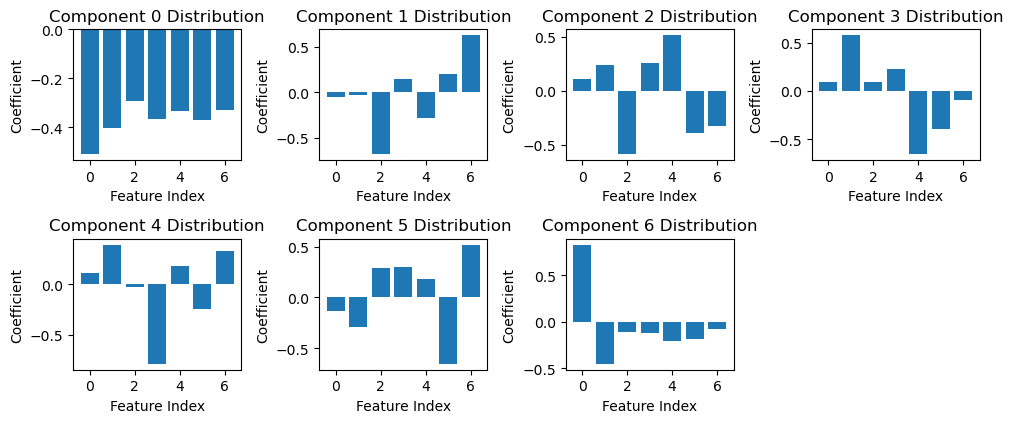

In [7]:
# 获取每个主成分的系数
components = pca.components_

# 绘制每个主成分的分布图
plt.figure(figsize=(10, 6))
for i in range(components.shape[0]):
    plt.subplot(3, 4, i+1)
    plt.bar(range(len(components[i])), components[i])
    plt.title(f'Component {i} Distribution')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()
#特征对主成分的贡献
#和上面的加载向量作用一样

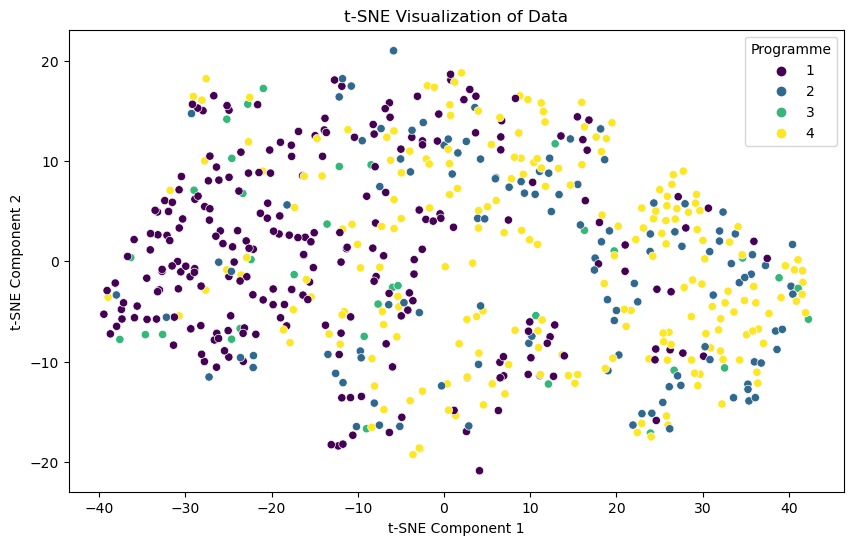

In [11]:
# 筛选数据
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 对每个 Programme 类别的数据应用 t-SNE 算法进行降维
tsne = TSNE()
tsne_data = tsne.fit_transform(scaled_data)

# 将 t-SNE 降维后的数据点绘制成散点图，根据 Programme 类别进行着色
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data['Programme'], palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Programme')
plt.show()


#效果很差

Text(0, 0.5, 'Explained Variance')

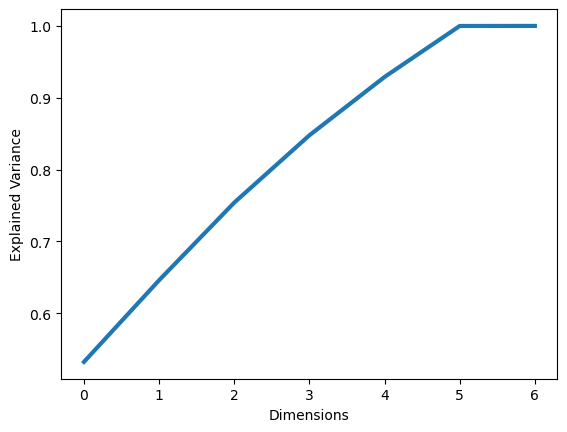

In [27]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 主成分数量的变化的影响

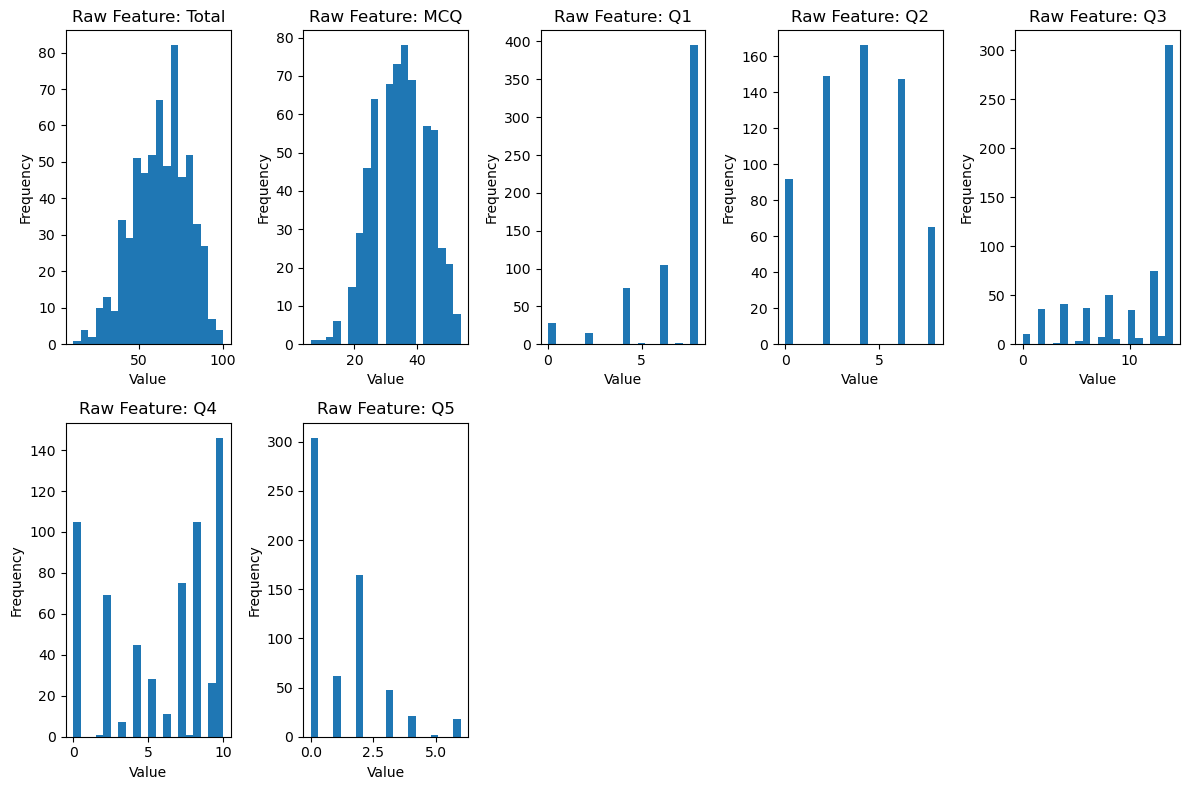

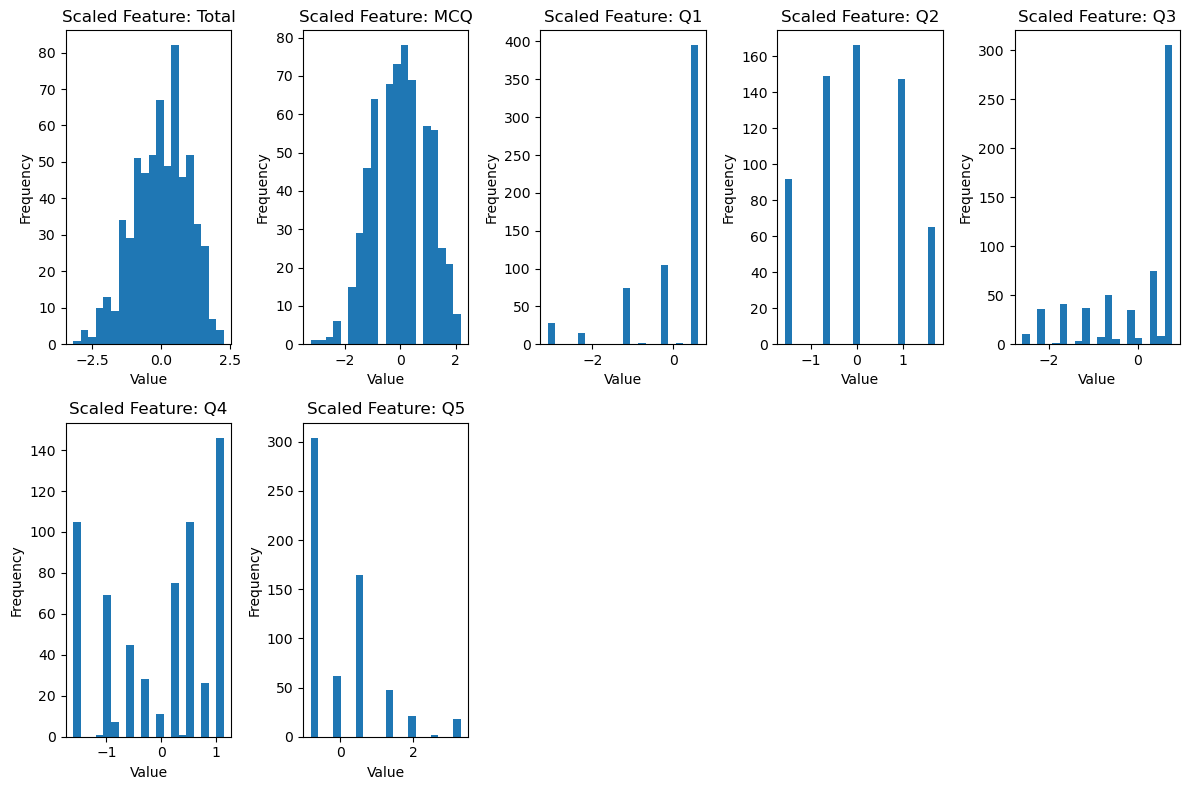

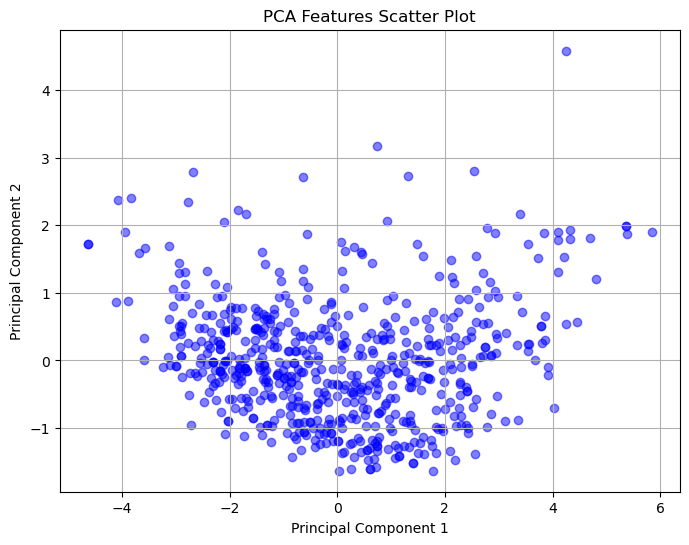

In [29]:
# 可视化原始特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data0.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(data[feature], bins=20)
    plt.title(f'Raw Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化标准化特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data0.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(scaled_data[:, i], bins=20)
    plt.title(f'Scaled Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化PCA特征
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Features Scatter Plot')
plt.grid(True)
plt.show()